#Importing Libraries  

In [ ]:
import pandas as pd 
import numpy as np

#LOADING AND VIEWING DATASET 

In [ ]:
df=pd.read_csv("crx.data" ,header=None)

In [ ]:
df.head() # ... the output in not clear from this data set because it has been anonymized in order to protect the privacy. 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [ ]:
# here I try to get some description about the data form the resource but it doesn't seem useful .
with open("/content/crx.names") as f: 
    print(f.read()) 


1. Title: Credit Approval

2. Sources: 
    (confidential)
    Submitted by quinlan@cs.su.oz.au

3.  Past Usage:

    See Quinlan,
    * "Simplifying decision trees", Int J Man-Machine Studies 27,
      Dec 1987, pp. 221-234.
    * "C4.5: Programs for Machine Learning", Morgan Kaufmann, Oct 1992
  
4.  Relevant Information:

    This file concerns credit card applications.  All attribute names
    and values have been changed to meaningless symbols to protect
    confidentiality of the data.
  
    This dataset is interesting because there is a good mix of
    attributes -- continuous, nominal with small numbers of
    values, and nominal with larger numbers of values.  There
    are also a few missing values.
  
5.  Number of Instances: 690

6.  Number of Attributes: 15 + class attribute

7.  Attribute Information:

    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z

In [ ]:
# After Searching on the Internet finding these name of the colums for typical credit Card application 
df.columns=["Gender", "Age", "Debt", "Married", "BankCustomer", "EducationLevel", "Ethnicity", "YearsEmployed", "PriorDefault", "Employed", "CreditScore", "DriversLicense", "Citizen", "ZipCode", "Income" ,"ApprovalStatus"]

In [ ]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [ ]:
df.info() # ... we can see that our data has 690 observation and 16 features and there is no misssing values until now . 
#Also data type is not perfect so we need to change them in Preprocessing and Cleaning stage .

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  ApprovalStatus  690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


#Preprocessing and Cleaning the data set 

1-Understanding Object Columns because there is no clear descrebtion  

In [ ]:
df["Gender"].value_counts() # we can see that gender has two values "b" ,"a" .. which related to male and feamle  #b is male / #a is female 
#so we need to change them into 0,1later . Also , we need to get rid of "?".

df["Gender"]=df["Gender"].replace('a',1)
df["Gender"]=df["Gender"].replace('b',0)
df["Gender"].value_counts()


0    468
1    210
?     12
Name: Gender, dtype: int64

In [ ]:
df["Age"].unique() # we can see that the age is float , we can see that we have "?" also so we need to deal with it and convert age to int by rounding it. 

array(['30.83', '58.67', '24.50', '27.83', '20.17', '32.08', '33.17',
       '22.92', '54.42', '42.50', '22.08', '29.92', '38.25', '48.08',
       '45.83', '36.67', '28.25', '23.25', '21.83', '19.17', '25.00',
       '47.75', '27.42', '41.17', '15.83', '47.00', '56.58', '57.42',
       '42.08', '29.25', '42.00', '49.50', '36.75', '22.58', '27.25',
       '23.00', '27.75', '54.58', '34.17', '28.92', '29.67', '39.58',
       '56.42', '54.33', '41.00', '31.92', '41.50', '23.92', '25.75',
       '26.00', '37.42', '34.92', '34.25', '23.33', '23.17', '44.33',
       '35.17', '43.25', '56.75', '31.67', '23.42', '20.42', '26.67',
       '36.00', '25.50', '19.42', '32.33', '34.83', '38.58', '44.25',
       '44.83', '20.67', '34.08', '21.67', '21.50', '49.58', '27.67',
       '39.83', '?', '37.17', '25.67', '34.00', '49.00', '62.50', '31.42',
       '52.33', '28.75', '28.58', '22.50', '28.50', '37.50', '35.25',
       '18.67', '54.83', '40.92', '19.75', '29.17', '24.58', '33.75',
       '25.42',

In [ ]:
df["Married"].value_counts()#aslo have "?"  , and "l" we can drop it .

u    519
y    163
?      6
l      2
Name: Married, dtype: int64

In [ ]:
df=df[df["Married"]!="l"] #filter data frame to drop "l" in Married column 
df["Married"]=df["Married"].replace('u',1)
df["Married"]=df["Married"].replace('y',0)
df["Married"].value_counts()

<ipython-input-1050-871a079548cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Married"]=df["Married"].replace('u',1)
<ipython-input-1050-871a079548cc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Married"]=df["Married"].replace('y',0)


1    519
0    163
?      6
Name: Married, dtype: int64

In [ ]:
df["BankCustomer"].value_counts() # also has 2 category and "?" but it seems 2 category
df["BankCustomer"]=df["BankCustomer"].replace('g',1)
df["BankCustomer"]=df["BankCustomer"].replace('p',0)
df["BankCustomer"].value_counts()

<ipython-input-1051-3a7c1d641f50>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["BankCustomer"]=df["BankCustomer"].replace('g',1)
<ipython-input-1051-3a7c1d641f50>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["BankCustomer"]=df["BankCustomer"].replace('p',0)


1    519
0    163
?      6
Name: BankCustomer, dtype: int64

In [ ]:
df["EducationLevel"].value_counts() # it has 14 unique values and ("?")
#df["EducationLevel"]=df["EducationLevel"]!="r"

c     137
q      78
w      64
i      59
aa     54
ff     52
k      51
cc     40
m      38
x      38
d      30
e      25
j      10
?       9
r       3
Name: EducationLevel, dtype: int64

In [ ]:
df["Ethnicity"].value_counts()#... 9 cat and one "?"
#df["Ethnicity"]=df["Ethnicity"]!="o"

v     399
h     138
bb     59
ff     56
?       9
j       8
z       8
dd      6
n       4
o       1
Name: Ethnicity, dtype: int64

In [ ]:
#df['Ethnicity']=df['Ethnicity'].replace('ff','fff')
#df['Ethnicity']=df['Ethnicity'].replace('j','jj')

In [ ]:
df["PriorDefault"].value_counts() # binary category
df["PriorDefault"]=df["PriorDefault"].replace('t',0)
df["PriorDefault"]=df["PriorDefault"].replace('f',1)
df["PriorDefault"].value_counts()

<ipython-input-1055-033df66cad15>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["PriorDefault"]=df["PriorDefault"].replace('t',0)
<ipython-input-1055-033df66cad15>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["PriorDefault"]=df["PriorDefault"].replace('f',1)


0    361
1    327
Name: PriorDefault, dtype: int64

In [ ]:
df["Employed"].value_counts() # binary 
df["Employed"]=df["Employed"].replace('t',0)
df["Employed"]=df["Employed"].replace('f',1)
df["Employed"].value_counts()

<ipython-input-1056-43eac16bfbc7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Employed"]=df["Employed"].replace('t',0)
<ipython-input-1056-43eac16bfbc7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Employed"]=df["Employed"].replace('f',1)


1    393
0    295
Name: Employed, dtype: int64

In [ ]:
df["DriversLicense"].value_counts()# binary 
df["DriversLicense"]=df["DriversLicense"].replace('t',0)
df["DriversLicense"]=df["DriversLicense"].replace('f',1)
df["DriversLicense"].value_counts()

<ipython-input-1057-47a664f4268f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DriversLicense"]=df["DriversLicense"].replace('t',0)
<ipython-input-1057-47a664f4268f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DriversLicense"]=df["DriversLicense"].replace('f',1)


1    374
0    314
Name: DriversLicense, dtype: int64

In [ ]:
df["Citizen"].value_counts() # 3 category 

g    625
s     56
p      7
Name: Citizen, dtype: int64

In [ ]:
df["ApprovalStatus"].value_counts() # + approve / - not approve we need to conert the to 0 and 1 

-    383
+    305
Name: ApprovalStatus, dtype: int64

2-numerical columns 

In [ ]:
df.describe()

,Debt,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Income
count,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000
mean,4.740036,2.215334,0.475291,0.571221,2.406977,0.543605,874.994186
std,4.938951,3.337134,0.499752,0.495262,4.868286,0.498457,3597.362582
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.165000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.750000,1.000000,0.000000,1.000000,0.000000,1.000000,5.000000
75%,7.122500,2.625000,1.000000,1.000000,3.000000,1.000000,394.500000
max,28.000000,28.500000,1.000000,1.000000,67.000000,1.000000,51100.000000


In [ ]:
df.columns

Index(['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel',
       'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'ApprovalStatus'],
      dtype='object')

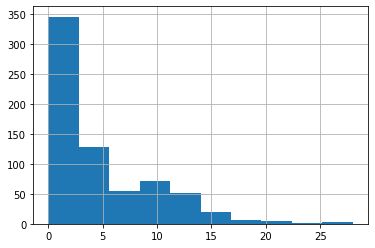

In [ ]:
df["Debt"].hist() # ... we can see most of people has no dept (right skew)

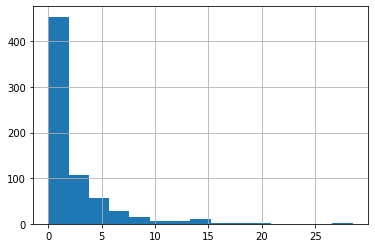

In [ ]:
df["YearsEmployed"].hist(bins=15) # most of people has nearly no experiance .

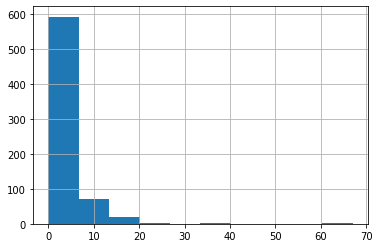

In [ ]:
df["CreditScore"].hist() # most of observation has low credit score  

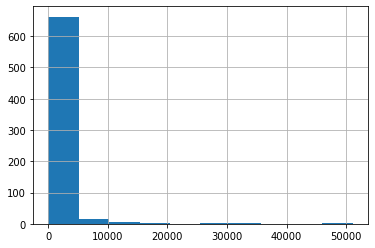

In [ ]:
df["Income"].hist()  # most of people has no income  also we can see the range is very high so we need to perform scaling if our model need for it .



Cleaning the data from "?" 



In [ ]:
# as we have said most of columns have "?" to get red of it . 
#df=df.replace("?" , np.nan)

In [ ]:
#df.isnull().sum() # we can see we have both cat and num columns need to imputation  (but first we need to before  imputing )

2- Data types 

In [ ]:
df.dtypes

Gender             object
Age                object
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault        int64
Employed            int64
CreditScore         int64
DriversLicense      int64
Citizen            object
ZipCode            object
Income              int64
ApprovalStatus     object
dtype: object

In [ ]:
df[["Gender" ,"Married","BankCustomer","EducationLevel","Ethnicity","PriorDefault","Employed","DriversLicense","Citizen","ApprovalStatus"]]=df[["Gender" ,"Married","BankCustomer","EducationLevel","Ethnicity","PriorDefault","Employed","DriversLicense","Citizen","ApprovalStatus"]].astype("category")

In [ ]:
df.dtypes

Gender            category
Age                 object
Debt               float64
Married           category
BankCustomer      category
EducationLevel    category
Ethnicity         category
YearsEmployed      float64
PriorDefault      category
Employed          category
CreditScore          int64
DriversLicense    category
Citizen           category
ZipCode             object
Income               int64
ApprovalStatus    category
dtype: object

In [ ]:

df["ApprovalStatus"]=df["ApprovalStatus"].replace("+",1)
df["ApprovalStatus"]=df["ApprovalStatus"].replace("-",0)

In [ ]:
r=pd.get_dummies(df[["EducationLevel","Ethnicity","Citizen"]])
df=pd.concat([df,r] ,axis=1)
df=df.drop(["EducationLevel","Ethnicity","Citizen"],axis=1)


In [ ]:
df

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,...,Ethnicity_ff,Ethnicity_h,Ethnicity_j,Ethnicity_n,Ethnicity_o,Ethnicity_v,Ethnicity_z,Citizen_g,Citizen_p,Citizen_s
0,0,30.83,0.000,1,1,1.25,0,0,1,1,...,0,0,0,0,0,1,0,1,0,0
1,1,58.67,4.460,1,1,3.04,0,0,6,1,...,0,1,0,0,0,0,0,1,0,0
2,1,24.50,0.500,1,1,1.50,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
3,0,27.83,1.540,1,1,3.75,0,0,5,0,...,0,0,0,0,0,1,0,1,0,0
4,0,20.17,5.625,1,1,1.71,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0,21.08,10.085,0,0,1.25,1,1,0,1,...,0,1,0,0,0,0,0,1,0,0
686,1,22.67,0.750,1,1,2.00,1,0,2,0,...,0,0,0,0,0,1,0,1,0,0
687,1,25.25,13.500,0,0,2.00,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
688,0,17.92,0.205,1,1,0.04,1,1,0,1,...,0,0,0,0,0,1,0,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split 
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X_train,X_test,y_train ,y_test=train_test_split(X,y,test_size=0.3 ,random_state=0)

In [ ]:
X_train=X_train.replace("?", np.nan)
X_test= X_test.replace("?",np.nan)

In [ ]:
X_train["Age"]=X_train["Age"].astype("float")
X_test["Age"]=X_test["Age"].astype("float")


In [ ]:
X_train_cat=X_train.select_dtypes("category")
X_test_cat=X_test.select_dtypes("category")

In [ ]:
from sklearn.impute import SimpleImputer
impute=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
X_train_cat=impute.fit_transform(X_train_cat)
X_test_cat=impute.transform(X_test_cat)


In [ ]:
X_train_cat

array([[0.0, 1.0, 1.0, ..., 1, 1, 0],
       [0.0, 0.0, 0.0, ..., 0, 1, 1],
       [0.0, 1.0, 1.0, ..., 1, 0, 0],
       ...,
       [1.0, 1.0, 1.0, ..., 0, 0, 0],
       [0.0, 1.0, 1.0, ..., 1, 1, 1],
       [1.0, 1.0, 1.0, ..., 0, 0, 0]], dtype=object)

In [ ]:
X_train_num=X_train.select_dtypes("number")
X_test_num=X_test.select_dtypes("number")

In [ ]:
impute=SimpleImputer(missing_values=np.nan,strategy="mean")
X_train_num=impute.fit_transform(X_train_num)
X_test_num=impute.transform(X_test_num)


In [ ]:
np.isnan(X_train_num).sum()

0

In [ ]:
#from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import OneHotEncoder 
#ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(sparse=False), [3,4,8])],remainder='passthrough')
#X_train_cat= np.array(ct.fit_transform(X_train_cat))
#X_train_cat

In [ ]:
#ct1=ColumnTransformer(transformers=[('encoder',OneHotEncoder(sparse=False), [3,4,8])],remainder='passthrough')
#X_test_cat= np.array(ct1.fit_transform(X_test_cat))

# Scaling 

In [ ]:
from sklearn.preprocessing import StandardScaler 

In [ ]:
scaler=StandardScaler()
X_train_num=scaler.fit_transform(X_train_num)
X_test_num=scaler.transform(X_test_num)

GATHERING

In [ ]:
X_train=np.concatenate([X_train_num,X_train_cat],axis=1)

In [ ]:
X_test=np.concatenate([X_test_num,X_test_cat],axis=1)

In [ ]:
from sklearn.linear_model import LogisticRegression 
# ... YOUR CODE FOR TASK 9 ...

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix ,classification_report
# ... YOUR CODE FOR TASK 10 ...

# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(X_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(X_test,y_test))

# Print the confusion matrix of the logreg model
print(confusion_matrix(y_test,y_pred))

Accuracy of logistic regression classifier:  0.9903381642512077
[[190   1]
 [  1  15]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       191
           1       0.94      0.94      0.94        16

    accuracy                           0.99       207
   macro avg       0.97      0.97      0.97       207
weighted avg       0.99      0.99      0.99       207



In [ ]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
# ... YOUR CODE FOR TASK 11 ...

# Define the grid of values for tol and max_iter
tol = [0.01, 0.001,0.0001]
max_iter = [100,150,200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = {"tol" :[0.01, 0.001,0.0001] ,"max_iter" :[100,150,200]}

In [ ]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Fit grid_model to the data
grid_model_result = grid_model.fit(X_train,y_train)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score,best_params ))

# Extract the best model and evaluate it on the test set
best_model = grid_model_result.best_params_
print("Accuracy of logistic regression classifier: ",best_model)

Best: 1.000000 using {'max_iter': 100, 'tol': 0.01}
Accuracy of logistic regression classifier:  {'max_iter': 100, 'tol': 0.01}


In [ ]:
logreg = LogisticRegression(**best_model)

# Fit logreg to the train set
logreg.fit(X_train,y_train)

LogisticRegression(tol=0.01)

In [ ]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix ,classification_report
# ... YOUR CODE FOR TASK 10 ...

# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(X_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(X_test,y_test))

# Print the confusion matrix of the logreg model
print(confusion_matrix(y_test,y_pred))

Accuracy of logistic regression classifier:  0.9903381642512077
[[190   1]
 [  1  15]]
